# Bazel C++
[link](https://docs.bazel.build/versions/main/tutorial/cpp.html)  
[awesome](https://github.com/jin/awesome-bazel)  

## Install
One can simplely install the bazel on MAC OS with brew.  
```shell
brew install bazel
```

## Example

```shell
git clone https://github.com/bazelbuild/examples
```

## Set up the Workspace

Special files for Bazel.  
- WORKSPACE file: 
    - identifies the directory and its contents as a Bazel workspace   
    - at the root of the project  
- BUILD files:  
    - A directory within the workspace that contains a BUILD file is a package.  

## Build File

Each instance of a build rule in the BUILD file is called a target and points to a specific set of source files and dependencies.  
A target can also point to other targets.  

In [ ]:
# cpp-tutorial/stage1/main
cc_binary(
    name = "hello-world",
    srcs = ["hello-world.cc"],
)

## Build the project
```sh
bazel build //main:hello-world
```

The BUILD file ocates at `main`, and the target has name `hello-world`.   
Bazel places build outputs in the bazel-bin directory at the root of the workspace. 

After build, there are 4 additional directories: 
```
├── README.md
├── WORKSPACE
├── bazel-bin -> /private/var/tmp/_bazel_v_xiongzikang/0766abc63fabe244fd1a5f0a47be4ea3/execroot/__main__/bazel-out/darwin-fastbuild/bin
├── bazel-out -> /private/var/tmp/_bazel_v_xiongzikang/0766abc63fabe244fd1a5f0a47be4ea3/execroot/__main__/bazel-out
├── bazel-stage1 -> /private/var/tmp/_bazel_v_xiongzikang/0766abc63fabe244fd1a5f0a47be4ea3/execroot/__main__
├── bazel-testlogs -> /private/var/tmp/_bazel_v_xiongzikang/0766abc63fabe244fd1a5f0a47be4ea3/execroot/__main__/bazel-out/darwin-fastbuild/testlogs
└── main
```

## Build multiple parts 

Take a look at the BUILD file in the `cpp-tutorial/stage2/main`.  

In [ ]:
cc_library(
    name = "hello-greet",
    srcs = ["hello-greet.cc"],
    hdrs = ["hello-greet.h"],
)

cc_binary(
    name = "hello-world",
    srcs = ["hello-world.cc"],
    deps = [
        ":hello-greet",
    ],
)

The deps attribute in the hello-world target tells Bazel that the hello-greet library is required to build the hello-world binary.  
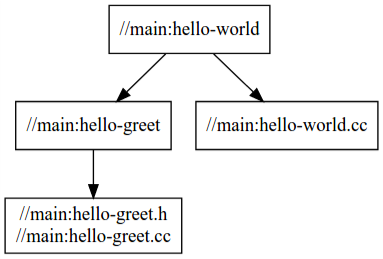

## Use multiple packages

Project structure: 
```sh
└──stage3
   ├── main
   │   ├── BUILD
   │   ├── hello-world.cc
   │   ├── hello-greet.cc
   │   └── hello-greet.h
   ├── lib
   │   ├── BUILD
   │   ├── hello-time.cc
   │   └── hello-time.h
   └── WORKSPACE
```

In [ ]:
# lib/BUILD
cc_library(
    name = "hello-time",
    srcs = ["hello-time.cc"],
    hdrs = ["hello-time.h"],
    visibility = ["//main:__pkg__"],
)

In [ ]:
# main/BUILD
cc_library(
    name = "hello-greet",
    srcs = ["hello-greet.cc"],
    hdrs = ["hello-greet.h"],
)

cc_binary(
    name = "hello-world",
    srcs = ["hello-world.cc"],
    deps = [
        ":hello-greet",
        "//lib:hello-time",
    ],
)

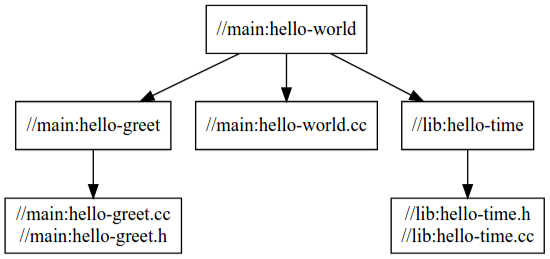

## Use labels to reference targets

Absolute path: `//path/to/package:target-name`, `//` is the root where the WORKSPACE located.  
In same package (with same BUILD): `:target-name`